# Project on Data Sciences and Machine Learning

## Model Training and Fitting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split #1

from sklearn.preprocessing import StandardScaler #1
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression #1
from sklearn.tree import  DecisionTreeClassifier #1
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #
from sklearn.svm import SVC #1
from sklearn.neighbors import KNeighborsClassifier

# import various functions from sklearn 


from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score #1
from sklearn.metrics import classification_report , roc_curve, auc #1
from sklearn.metrics import confusion_matrix #1
from sklearn.metrics import roc_curve #1



# import function to perform feature selection
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


### Model Fitting

In [4]:
df_model = pd.read_csv('diabetic_data_cleaned.csv')

In [92]:
df_model.shape

(9366, 45)

In [5]:
X = df_model.drop('readmitted',axis=1)

y = df_model['readmitted']

train_test_split from sklearn.model_selection is a function that splits arrays or matrices into random train and test subsets. It is a fundamental tool in machine learning for evaluating model performance on unseen data, preventing overfitting, and ensuring the model generalizes well.
X: The feature dataset.
y: The target variable dataset.
test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%).
random_state: Seed for the random number generator to ensure reproducibility.

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

StandardScaler from scikit-learn is a preprocessing technique used to standardize numerical features 
by removing the mean and scaling to unit variance. This transformation centers the data around zero with a 
standard deviation of one, following the formula: z = (x - u) / s where x is the original value, u is the mean of the training samples, 
and s is the standard deviation of the training samples. 
fit(data):
This method calculates the parameters needed for transformation, such as the mean and standard deviation for scaling or the minimum and maximum values for normalization.
transform(data):
This method applies the transformation to the data using the parameters calculated in the fit() step. 
fit_transform(data):
This method performs both fit() and transform() on the same data. It first calculates the transformation parameters and then applies the transformation to the data.

In [7]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7492, 44), (1874, 44), (7492,), (1874,))



Results
                           Accuracy       MSE        R2
Support Vector Classifier  0.905550  0.094450 -0.104302
Decision Tree              0.903415  0.096585 -0.129258
Random Forest              0.905550  0.094450 -0.104302
Gradient Boosting          0.892743  0.107257 -0.254038
KNeighborsClassifier       0.905550  0.094450 -0.104302


Conclusion

The model with the highest accuracy is: Support Vector Classifier
The model with the highest R2 is: Support Vector Classifier
The model with the Lowest MSE is: Support Vector Classifier




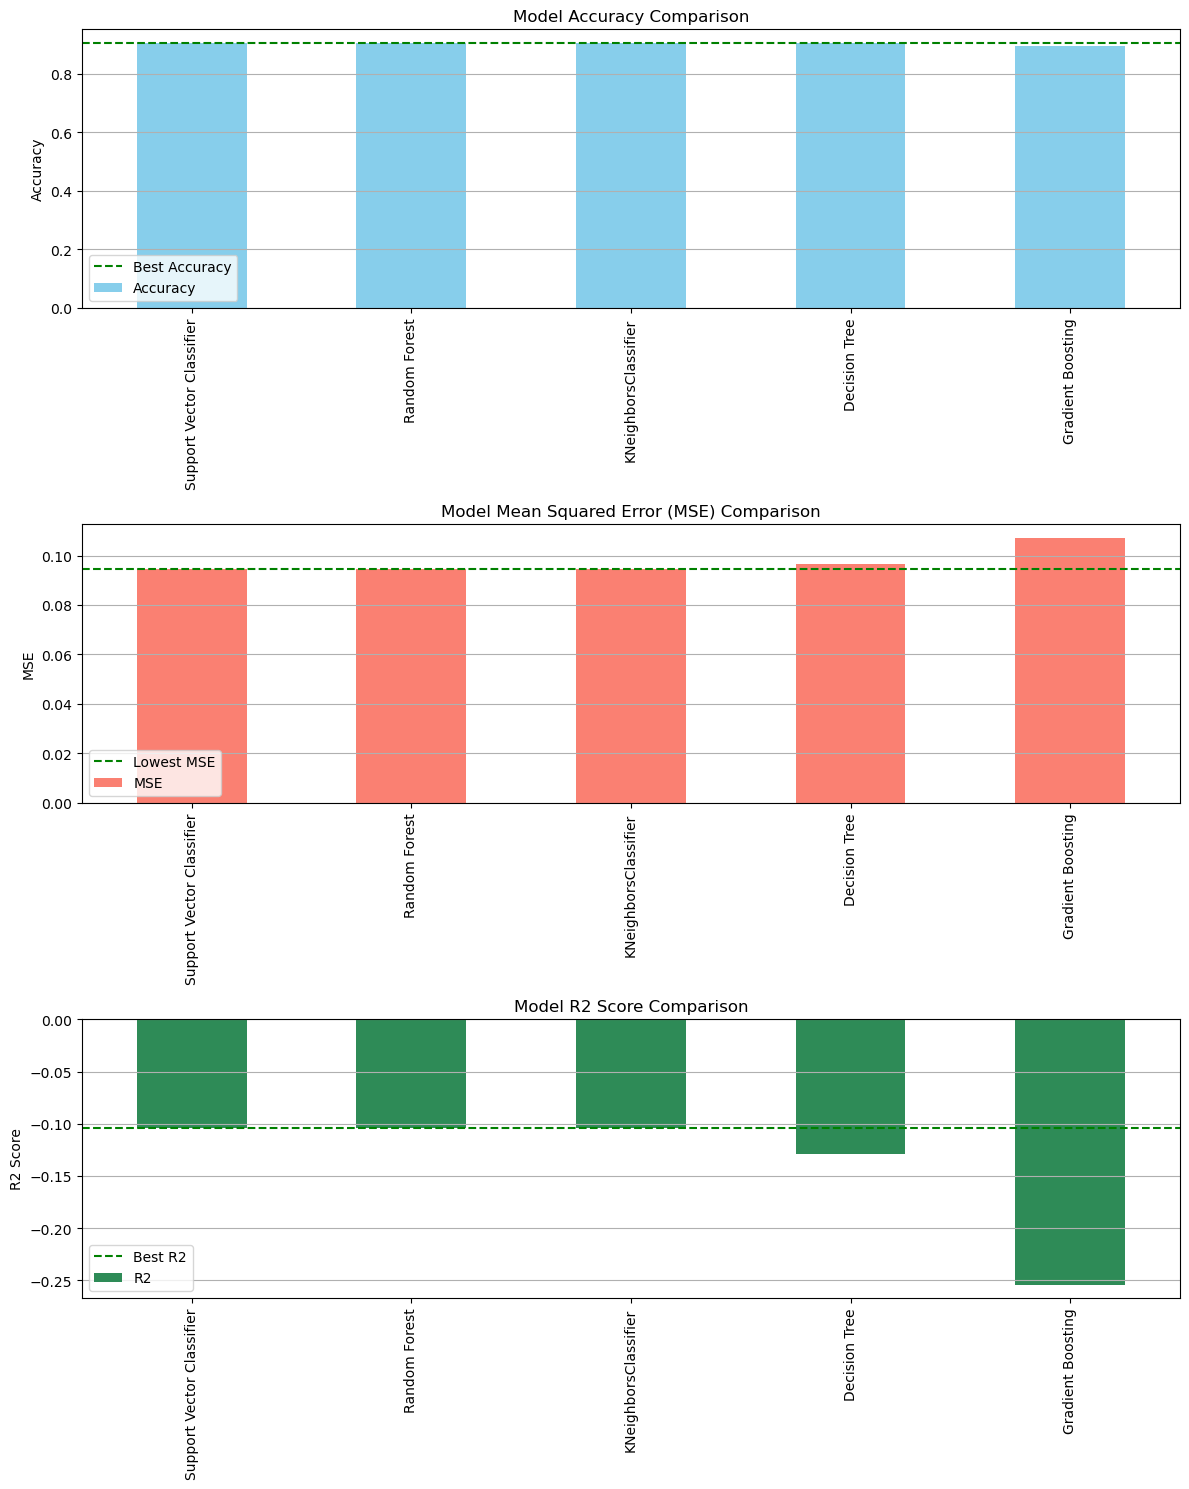

In [98]:
# Train and evaluate each model
results = {}

# Define models
models = {


    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()

}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_scaled)

    #print(y_pred)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))


    results[name] = {
        'Accuracy': accuracy,
        'MSE': mse,
        'R2': r2
    }


# Display the results
results_df = pd.DataFrame(results).T #Transpose
print()
print()
print("Results")
print(results_df)

print()
print()
print('Conclusion')
print()
minMSE=min(results_df["MSE"])
maxR2=max(results_df["R2"])
minMSEModel=results_df.loc[results_df['MSE'] == minMSE]
maxR2Model=results_df.loc[results_df['R2'] == maxR2]

max_accuracy_model = max(results, key=lambda name: results[name]['Accuracy'])
max_r2_model = max(results, key=lambda name: results[name]['R2'])
min_MSE_model = min(results, key=lambda name: results[name]['MSE'])


print(f"The model with the highest accuracy is: {max_accuracy_model}")
print(f"The model with the highest R2 is: {max_r2_model}")
print(f"The model with the Lowest MSE is: {min_MSE_model}")
print()
print()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Accuracy plot
results_df.sort_values("Accuracy", ascending=False).plot(kind='bar', y='Accuracy', ax=axes[0], color='skyblue')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].grid(axis='y')
axes[0].axhline(results[max_accuracy_model]['Accuracy'], color='green', linestyle='--', label='Best Accuracy')
axes[0].legend()

# MSE plot
results_df.sort_values("MSE", ascending=True).plot(kind='bar', y='MSE', ax=axes[1], color='salmon')
axes[1].set_title('Model Mean Squared Error (MSE) Comparison')
axes[1].set_ylabel('MSE')
axes[1].grid(axis='y')
axes[1].axhline(results[min_MSE_model]['MSE'], color='green', linestyle='--', label='Lowest MSE')
axes[1].legend()

# R2 plot
results_df.sort_values("R2", ascending=False).plot(kind='bar', y='R2', ax=axes[2], color='seagreen')
axes[2].set_title('Model R2 Score Comparison')
axes[2].set_ylabel('R2 Score')
axes[2].grid(axis='y')
axes[2].axhline(results[max_r2_model]['R2'], color='green', linestyle='--', label='Best R2')
axes[2].legend()

plt.tight_layout()
plt.show()

In [9]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [10]:
y_pred = RF.predict(X_test)

In [11]:
confusion_matrix(y_test.astype(int), y_pred.astype(int))

array([[1697,    0],
       [ 177,    0]], dtype=int64)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1697
           1       0.00      0.00      0.00       177

    accuracy                           0.91      1874
   macro avg       0.45      0.50      0.48      1874
weighted avg       0.82      0.91      0.86      1874



In [13]:
import imblearn
#Using SMOTE to handle Imbalanced Data.
from imblearn.over_sampling import SMOTE

In [14]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:

RF.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(1.0, 0.9048175182481751)

In [18]:
y_pred = RF.predict(X_test)

In [19]:
confusion_matrix(y_test.astype(int), y_pred.astype(int))

array([[1524,  163],
       [ 163, 1575]], dtype=int64)

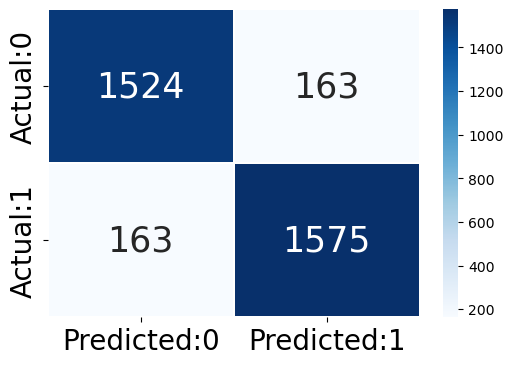

In [20]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [21]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1687
           1       0.91      0.91      0.91      1738

    accuracy                           0.90      3425
   macro avg       0.90      0.90      0.90      3425
weighted avg       0.90      0.90      0.90      3425



In [22]:
TP=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[1,1]

In [23]:
CF_Accuracy= (TP+TN) / (TP+TN+FP+FN)
#CF_Accuracy=(8304+7915) / (8304+797+1066+7915)
CF_Accuracy

0.9048175182481751

In [24]:
CF_Precision=TP / (TP+FP)
CF_Precision

0.9033787788974511

In [26]:
CF_Recall = TP / (TP+FN)
CF_Recall

0.9033787788974511

In [27]:
CF_F1Score= 2 * ((CF_Precision * CF_Recall) / (CF_Precision+CF_Recall))
CF_F1Score

0.9033787788974511

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1687
           1       0.91      0.91      0.91      1738

    accuracy                           0.90      3425
   macro avg       0.90      0.90      0.90      3425
weighted avg       0.90      0.90      0.90      3425



In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


In [34]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Final pipeline with best parameters
final_model = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        class_weight='balanced',  # Still useful for robustness
        random_state=42
    ))
])

# Train on the full training set
final_model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = final_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1687
           1       0.91      0.91      0.91      1738

    accuracy                           0.91      3425
   macro avg       0.91      0.91      0.91      3425
weighted avg       0.91      0.91      0.91      3425

Confusion Matrix:
 [[1532  155]
 [ 159 1579]]


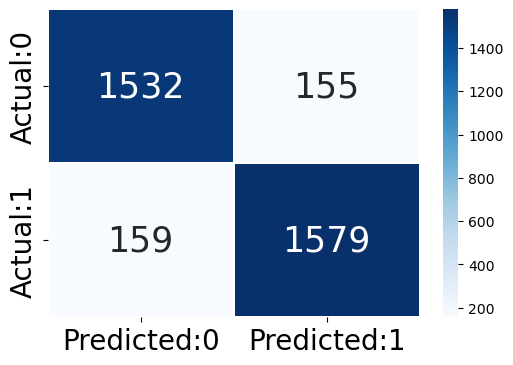

In [36]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'],  linewidths = 0.1, annot_kws = {'size':20})
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cmap ='Blues',  linewidths = 0.1, annot_kws = {'size':25}, )
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

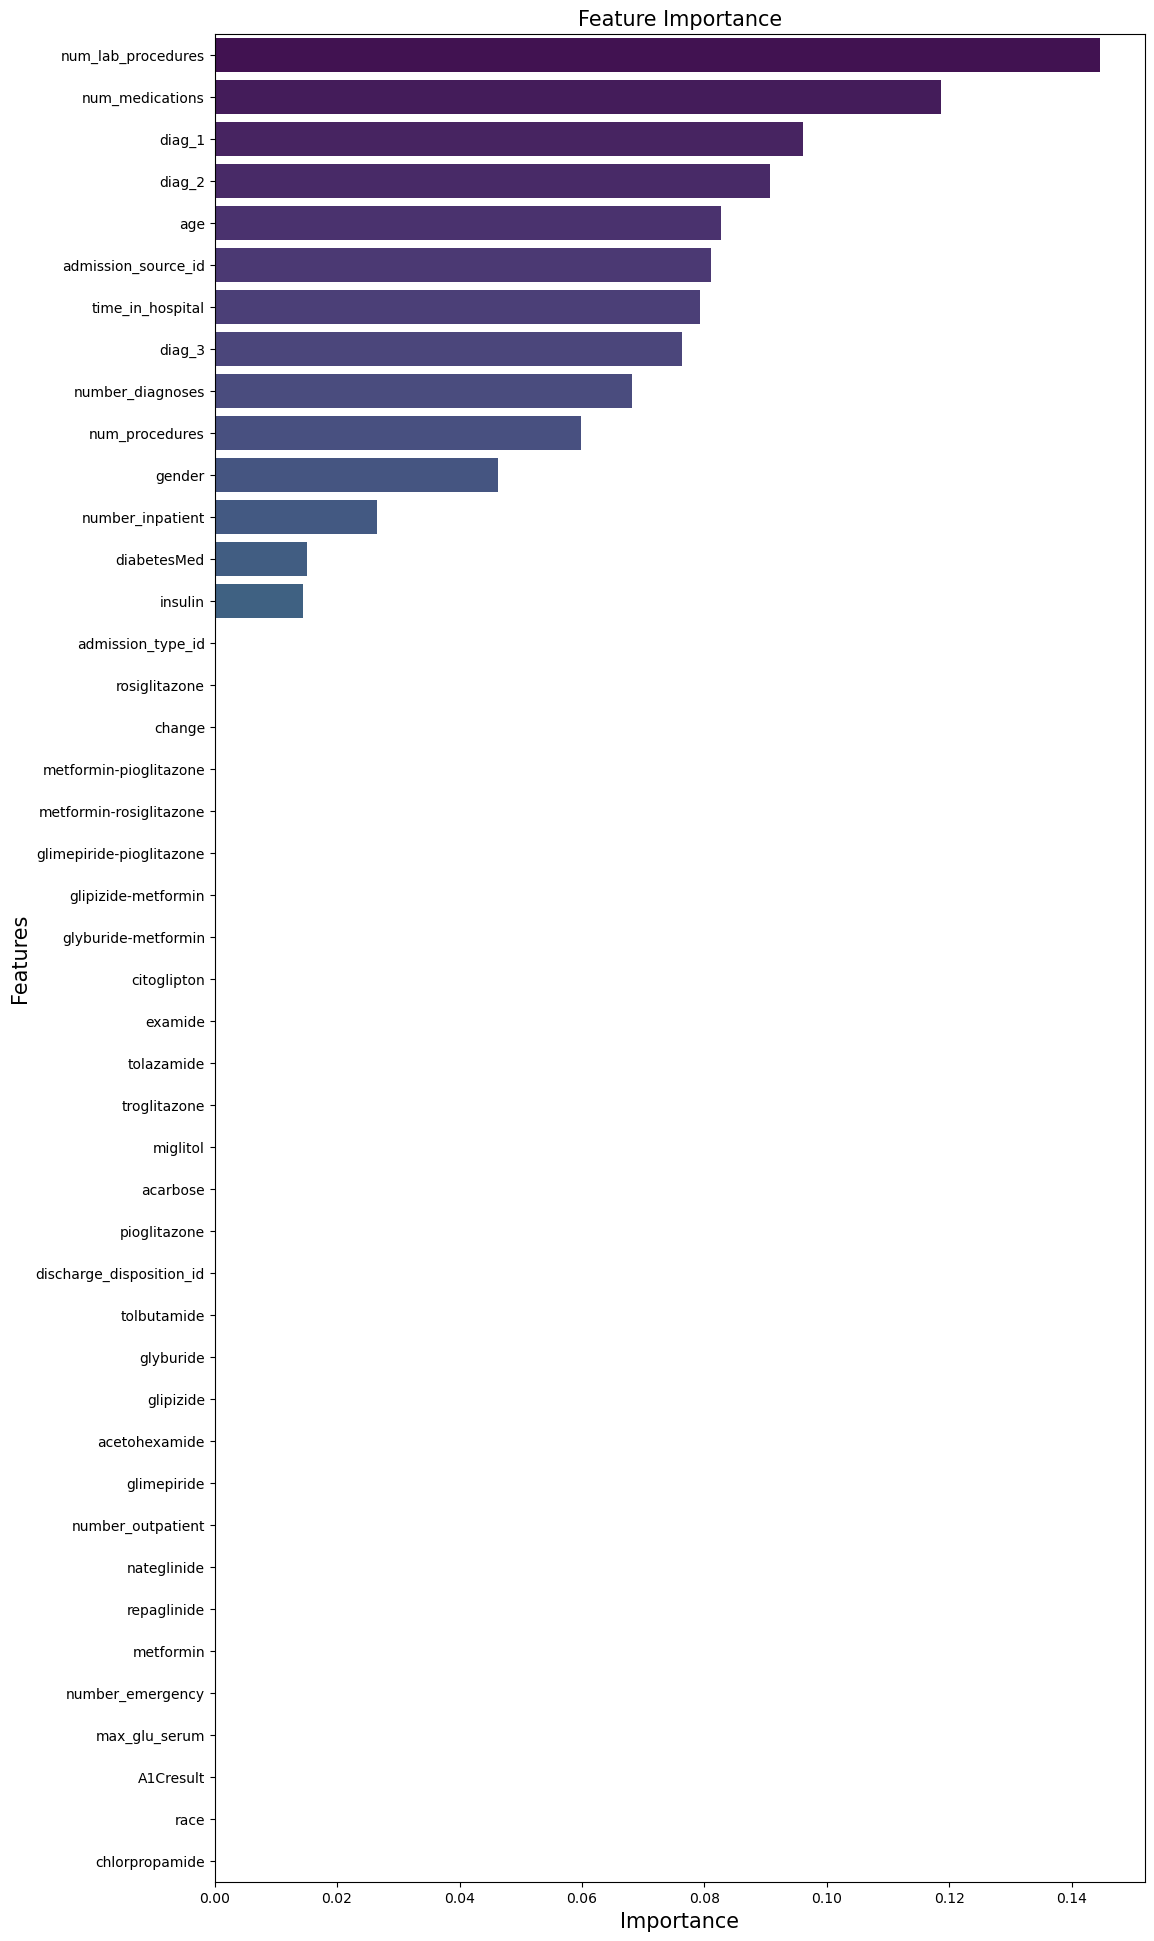

                    Features  Importance
2         num_lab_procedures    0.144694
4            num_medications    0.118731
16                    diag_1    0.096096
17                    diag_2    0.090753
0                        age    0.082707
15       admission_source_id    0.081072
1           time_in_hospital    0.079315
18                    diag_3    0.076361
8           number_diagnoses    0.068159
3             num_procedures    0.059817
12                    gender    0.046364
7           number_inpatient    0.026441
43               diabetesMed    0.015040
36                   insulin    0.014450
13         admission_type_id    0.000000
29             rosiglitazone    0.000000
42                    change    0.000000
41    metformin-pioglitazone    0.000000
40   metformin-rosiglitazone    0.000000
39  glimepiride-pioglitazone    0.000000
38       glipizide-metformin    0.000000
37       glyburide-metformin    0.000000
35               citoglipton    0.000000
34              

In [49]:
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': RF.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(12,24))
sns.barplot(x = 'Importance', y = 'Features', data = important_features, palette='viridis')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

print(important_features)

In [ ]:
input_df = pd.DataFrame([user_input0])


# Prediction
prediction = final_model.predict(input_df)[0]
print(prediction)
if prediction == 1:
    print("High risk of readmission within 30 days!")
elif prediction == 0:
    print("Low risk of readmission within 30 days.")

0
Low risk of readmission within 30 days.


## Model Saving

In [129]:
import joblib
model=SVC()

model.fit(X_train, y_train)
# Save the model
joblib.dump(model, 'SVC.joblib')

['SVC.joblib']

In [37]:
user_input1={'age':65,
'time_in_hospital':10,
'num_lab_procedures':60,
'num_procedures':0,
'num_medications':15,
'number_outpatient':0,
'number_emergency':0,
'number_inpatient':0,
'number_diagnoses':9,
'max_glu_serum':0,
'A1Cresult':2,
'race':2,
'gender':0,
'admission_type_id':0,
'discharge_disposition_id':1,
'admission_source_id':0,
'diag_1':0,
'diag_2':1,
'diag_3':0,
'metformin':1,
'repaglinide':1,
'nateglinide':1,
'chlorpropamide':1,
'glimepiride':1,
'acetohexamide':0,
'glipizide':1,
'glyburide':1,
'tolbutamide':0,
'pioglitazone':1,
'rosiglitazone':1,
'acarbose':1,
'miglitol':1,
'troglitazone':0,
'tolazamide':0,
'examide':0,
'citoglipton':0,
'insulin':3,
'glyburide-metformin':1,
'glipizide-metformin':0,
'glimepiride-pioglitazone':0,
'metformin-rosiglitazone':0,
'metformin-pioglitazone':0,
'change':1,
'diabetesMed':1
}

In [31]:
user_input0={'age':45,
'time_in_hospital':9,
'num_lab_procedures':47,
'num_procedures':2,
'num_medications':17,
'number_outpatient':0,
'number_emergency':0,
'number_inpatient':0,
'number_diagnoses':9,
'max_glu_serum':0,
'A1Cresult':0,
'race':0,
'gender':0,
'admission_type_id':1,
'discharge_disposition_id':1,
'admission_source_id':0,
'diag_1':1,
'diag_2':0,
'diag_3':4,
'metformin':1,
'repaglinide':1,
'nateglinide':1,
'chlorpropamide':1,
'glimepiride':1,
'acetohexamide':0,
'glipizide':1,
'glyburide':1,
'tolbutamide':0,
'pioglitazone':1,
'rosiglitazone':1,
'acarbose':1,
'miglitol':1,
'troglitazone':0,
'tolazamide':0,
'examide':0,
'citoglipton':0,
'insulin':2,
'glyburide-metformin':1,
'glipizide-metformin':0,
'glimepiride-pioglitazone':0,
'metformin-rosiglitazone':0,
'metformin-pioglitazone':0,
'change':0,
'diabetesMed':1,

}

In [39]:
user_input11={'age':55,
'time_in_hospital':8,
'num_lab_procedures':73,
'num_procedures':2,
'num_medications':19,
'number_outpatient':0,
'number_emergency':0,
'number_inpatient':0,
'number_diagnoses':9,
'max_glu_serum':0,
'A1Cresult':2,
'race':1,
'gender':1,
'admission_type_id':1,
'discharge_disposition_id':1,
'admission_source_id':0,
'diag_1':5,
'diag_2':1,
'diag_3':7,
'metformin':1,
'repaglinide':1,
'nateglinide':1,
'chlorpropamide':1,
'glimepiride':1,
'acetohexamide':0,
'glipizide':1,
'glyburide':1,
'tolbutamide':0,
'pioglitazone':1,
'rosiglitazone':1,
'acarbose':1,
'miglitol':1,
'troglitazone':0,
'tolazamide':0,
'examide':0,
'citoglipton':0,
'insulin':3,
'glyburide-metformin':1,
'glipizide-metformin':0,
'glimepiride-pioglitazone':0,
'metformin-rosiglitazone':0,
'metformin-pioglitazone':0,
'change':1,
'diabetesMed':1,
}

In [ ]:
input_df = pd.DataFrame([user_input0])


# Prediction
prediction = SV.predict(input_df)[0]
print(prediction)
if prediction == 1:
    print("High risk of readmission within 30 days!")
elif prediction == 0:
    print("Low risk of readmission within 30 days.")

1
High risk of readmission within 30 days!


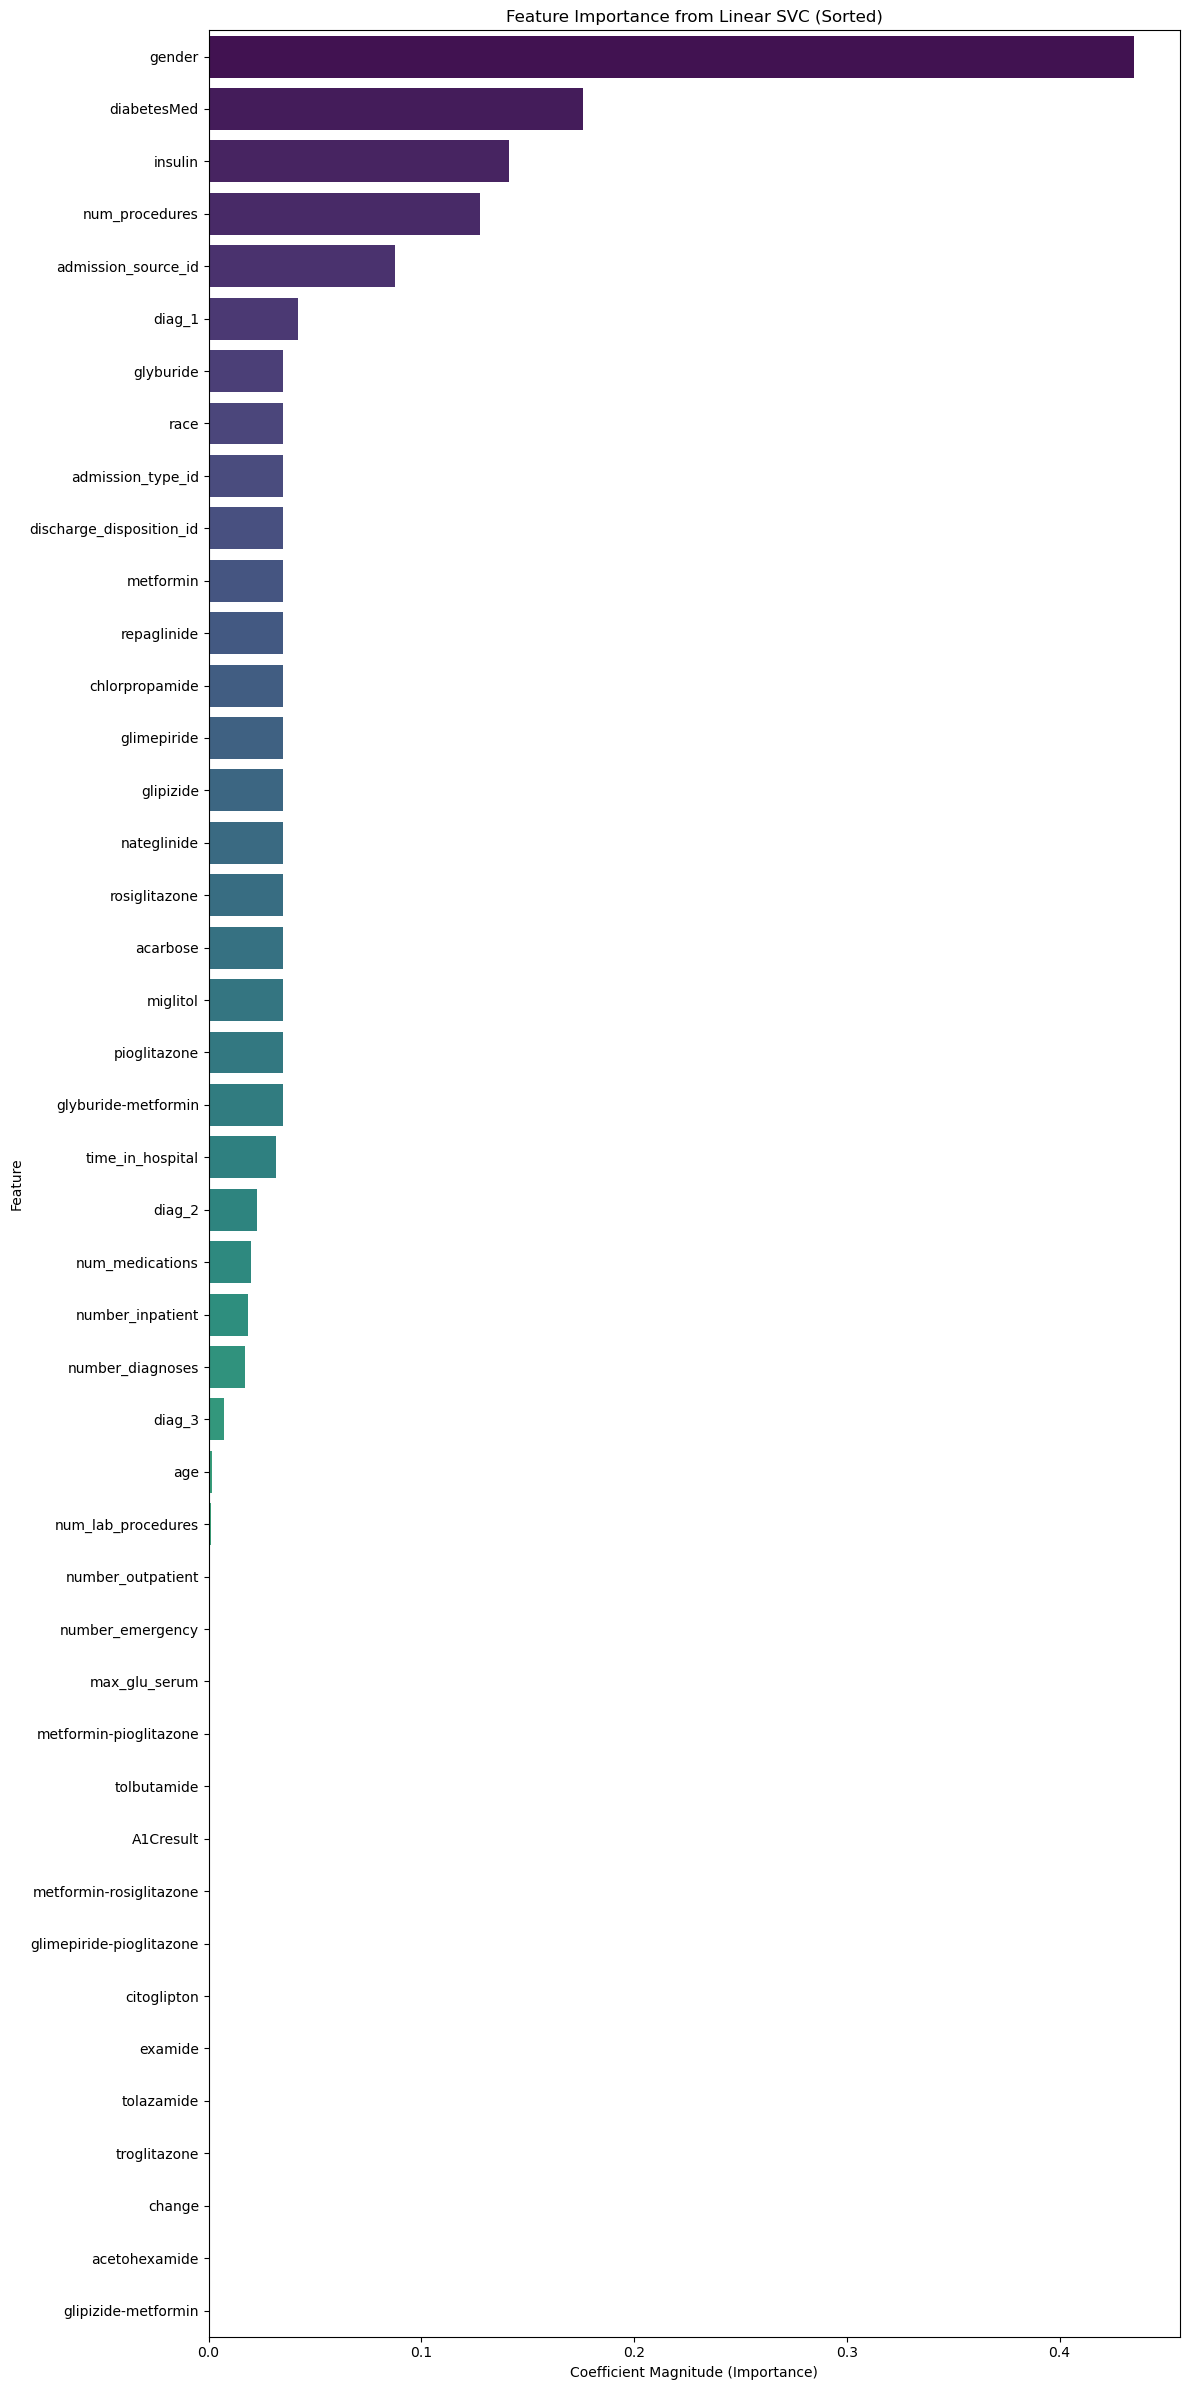

In [151]:
# Train model
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)

# Get feature importances (absolute coefficients)
importance = np.abs(model.coef_[0])

# Sort features by importance
sorted_indices = np.argsort(importance)[::-1]  # Descending order
sorted_importance = importance[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(12, 24))
sns.barplot(x=sorted_importance, y=sorted_features, palette="viridis")
plt.title("Feature Importance from Linear SVC (Sorted)")
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()